### 1. Introduction

Project Overview:

This project focuses on the comprehensive analysis of an aircraft engine maintenance dataset, providing key insights into the operational health of engines over time. The dataset simulates real-world scenarios where engines are exposed to varying environmental and operational conditions, making it highly relevant for predictive maintenance and operational efficiency in the aviation industry.

Through rigorous Exploratory Data Analysis (EDA), statistical analysis, and visualizations, the project aims to uncover patterns related to engine health, failure risks, fuel consumption, and maintenance needs. The insights gained from this analysis are critical for enhancing safety measures, optimizing maintenance schedules, and minimizing operational costs for aircraft fleets.
Project Objectives:

    Exploratory Data Analysis (EDA): Conduct a detailed EDA to uncover trends, outliers, and relationships within the dataset. This includes analyzing temperature, pressure, rotational speed, fuel consumption, and other key operational metrics.

    Operational Insights and Safety Enhancements: Analyze engine health and failure data to identify potential risk factors and inform strategies for improving safety protocols and reducing the likelihood of engine failures.

    Maintenance Optimization: Investigate patterns in engine performance and maintenance needs to optimize scheduling and reduce unnecessary maintenance costs, improving overall operational efficiency.

    Fuel Efficiency and Environmental Factors: Explore the relationship between environmental factors (e.g., altitude, humidity) and engine performance metrics (e.g., fuel consumption) to suggest improvements in fuel efficiency.

    Visualization and Reporting: Develop clear, insightful visualizations that communicate key findings to non-technical stakeholders, ensuring that results are actionable and easy to interpret.

    Predictive Maintenance Recommendations: Provide data-driven recommendations for predictive maintenance, helping to reduce unexpected downtime and extend engine life cycles.



### 2. Import Necessary Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Filter out warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### 3. Data Loading and Initial Overview

In [6]:
# Import necessary libraries
import pandas as pd


In [7]:
# Load the generated dataset
engine_df = pd.read_csv(r"aircraft_engine_maintenance(1).csv") 

In [8]:
# Display the first few rows of the dataset
engine_df.head()

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0


Dataset Overview:

    The dataset consists of 8 columns: Engine_ID, Timestamp, Temperature, Pressure, Rotational_Speed, Engine_Health, Engine_Failure, and an unnamed index column.
    The Timestamp column indicates when the data was recorded, and other features represent engine performance at that time.

### 4. Summary Statistics

In [11]:
summary_statistics = engine_df.describe()
summary_statistics

,Unnamed: 0,Engine_ID,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
count,720.000000,720.000000,685.000000,693.000000,720.000000,720.000000,720.000000
mean,359.500000,3.000000,498.339948,119.740059,2997.446124,1.158035,0.116667
std,207.990384,1.415197,49.096470,14.057048,203.755951,0.193976,0.321246
min,0.000000,1.000000,356.824273,75.250630,2370.470207,0.590569,0.000000
25%,179.750000,2.000000,467.160580,109.919889,2854.694306,1.022511,0.000000
50%,359.500000,3.000000,498.815093,119.774723,2993.435872,1.158039,0.000000
75%,539.250000,4.000000,531.952930,128.818293,3139.991527,1.288339,0.000000
max,719.000000,5.000000,662.723810,167.893847,3552.492220,1.791977,1.000000


### 5. Handle missing values

In [13]:
engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        720 non-null    int64  
 1   Engine_ID         720 non-null    int64  
 2   Timestamp         720 non-null    object 
 3   Temperature       685 non-null    float64
 4   Pressure          693 non-null    float64
 5   Rotational_Speed  720 non-null    float64
 6   Engine_Health     720 non-null    float64
 7   Engine_Failure    720 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 45.1+ KB


There are 720 rows (entries) and 8 columns in the DataFrame. Most columns have 720 non-null values, indicating that there are no missing values in those columns.
The Temperature and Pressure columns have some missing values (685 and 693 non-null values, respectively).

In [15]:
# Check for missing values
missing_values = engine_df.isnull().sum()
missing_values

Unnamed: 0           0
Engine_ID            0
Timestamp            0
Temperature         35
Pressure            27
Rotational_Speed     0
Engine_Health        0
Engine_Failure       0
dtype: int64

Columns with missing values:

    Temperature: 35 missing values
    Pressure: 27 missing values

<Axes: >

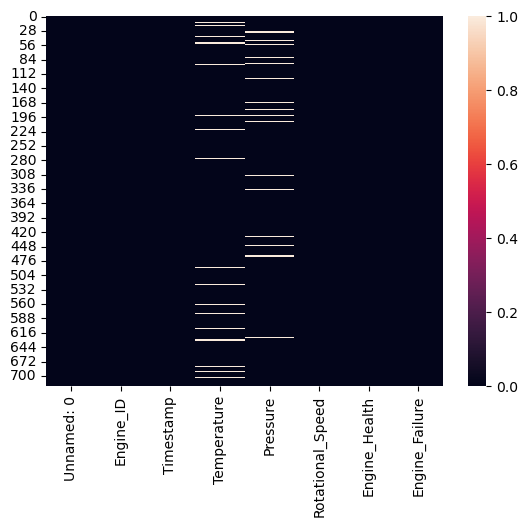

In [17]:
import seaborn as sns

sns.heatmap(engine_df.isnull())

In [18]:
# Display columns with missing values
columns_with_missing = missing_values[missing_values > 0].index
print(f"Columns with missing values: {columns_with_missing}")

Columns with missing values: Index(['Temperature', 'Pressure'], dtype='object')


In [19]:
# Impute missing values (replace with mean, median, or specific strategy)
numerical_columns = ["Engine_ID",	"Temperature",	"Pressure",	"Rotational_Speed",	"Engine_Health"]
engine_df.fillna(engine_df[numerical_columns].mean(), inplace=True)

In [20]:
engine_df.head()

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0


Imputation Strategy:

    We impute missing values using the mean of the respective numerical columns.

<Axes: >

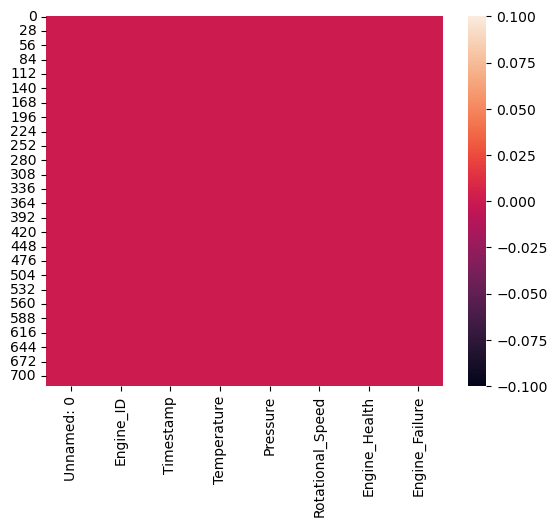

In [22]:
#confirm if there is still missing values
sns.heatmap(engine_df.isnull())

### 6. Handling outliers

In [24]:
# Calculate IQR for each column
Q1 = engine_df[numerical_columns].quantile(0.25)
Q3 = engine_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((engine_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (engine_df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)



# Display the number of outliers
print(f"Number of outliers: {outliers.sum()}")


# Display the outlier records
engine_df[outliers]

Number of outliers: 28


,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
22,22,1,2023-01-01 03:40:00,533.635773,137.049983,3150.407616,1.791977,0
47,47,1,2023-01-01 07:50:00,527.287060,119.740059,3126.762328,1.694284,1
60,60,1,2023-01-01 10:00:00,371.510311,120.605473,3016.902516,1.274749,0
91,91,1,2023-01-01 15:10:00,632.679004,119.740059,3172.149157,1.253916,0
108,108,1,2023-01-01 18:00:00,503.226730,121.167855,3302.271877,0.623076,0
116,116,1,2023-01-01 19:20:00,581.781431,124.478565,2370.470207,0.922681,0
263,263,2,2023-01-01 19:50:00,538.015508,125.204393,2397.496311,0.956164,0
286,286,2,2023-01-01 23:40:00,367.624885,113.118632,3093.883058,1.043080,0
338,338,3,2023-01-01 08:20:00,356.824273,90.269884,3485.596319,0.984538,0
352,352,3,2023-01-01 10:40:00,423.023441,82.212844,2615.461567,0.891795,1


Outliers in the data can skew results, so we use the Interquartile Range (IQR) method to detect and remove them.

In [26]:
# Remove outliers based on IQR
engine_df = engine_df[~outliers]

# Display the dataset after handling outliers
engine_df

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0
...,...,...,...,...,...,...,...,...
715,715,5,2023-01-01 23:10:00,421.013489,97.450729,2900.108876,1.128137,0
716,716,5,2023-01-01 23:20:00,471.540883,111.988270,3325.679936,1.410541,0
717,717,5,2023-01-01 23:30:00,539.021207,129.277527,2763.037311,1.326841,0
718,718,5,2023-01-01 23:40:00,525.968945,119.488649,2818.602719,0.987268,0


### 7. Exploratory Data Analysis

### Univariate Analysis:

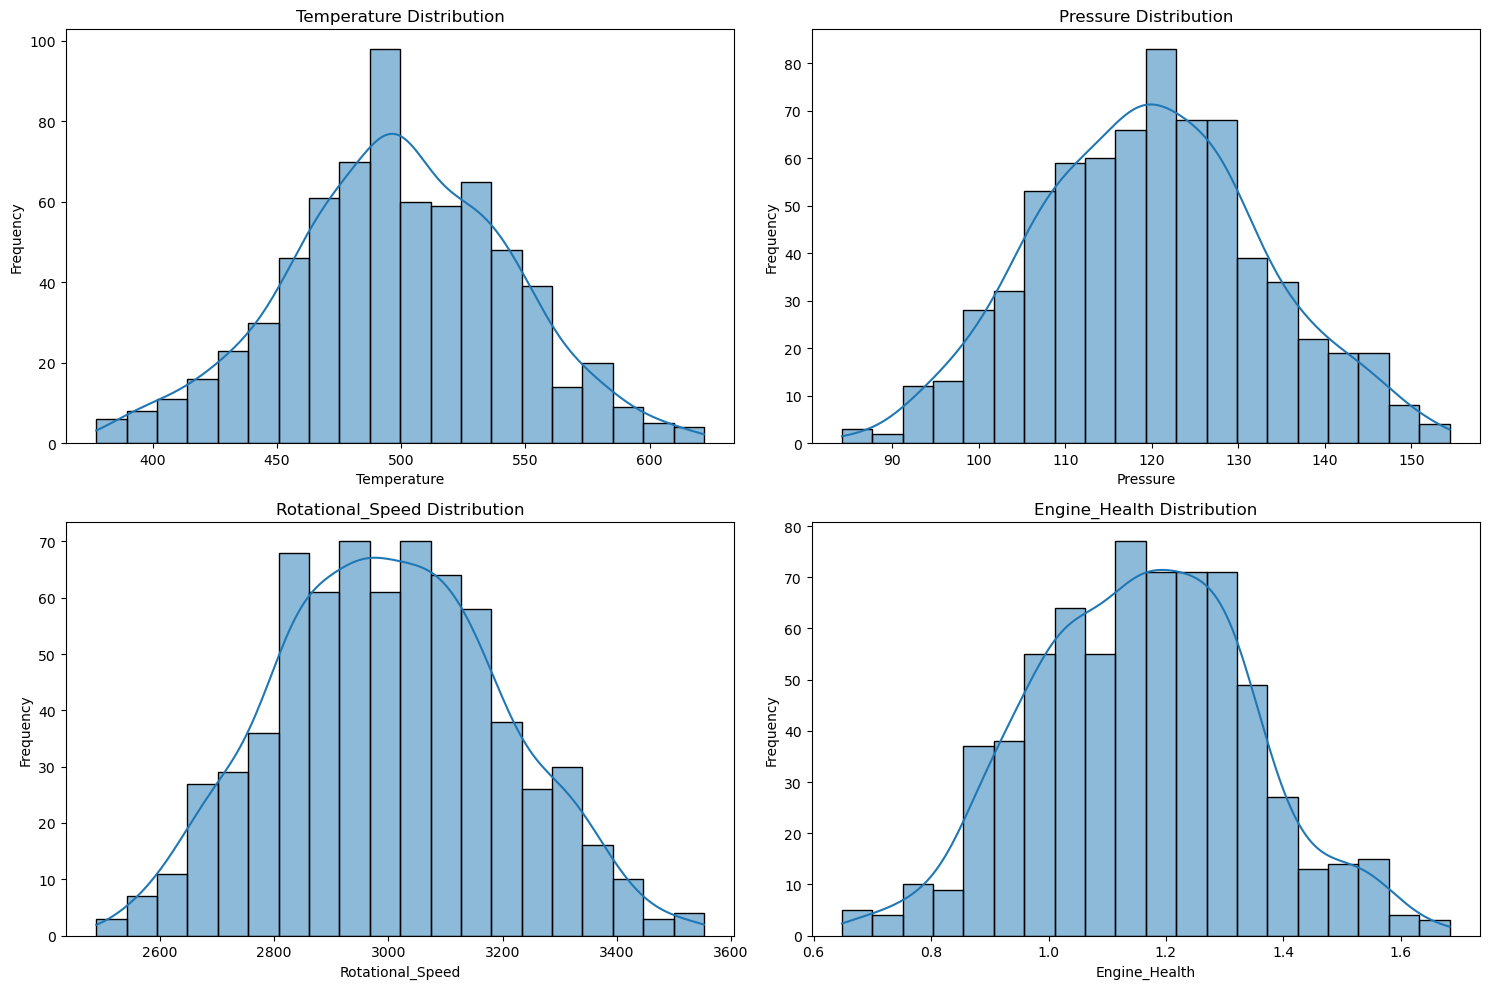

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Univariate analysis - Histograms

columns_to_check = ["Temperature",	"Pressure",	"Rotational_Speed",	"Engine_Health"]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.histplot(engine_df[column], bins=20, kde=True)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

We visualize the distribution of key features like Temperature, Pressure, Rotational_Speed, and Engine_Health using histograms.

They frepresent different distributions related to engine performance metrics:

Temperature Distribution:
The temperature ranges from about 375 to 625, with the peak frequency around 500. The distribution appears roughly normal (bell-shaped), with a slight right skew.

Pressure Distribution:
Pressure values range from about 85 to 155, peaking around 120. This distribution also appears approximately normal.

Rotational_Speed Distribution:
Rotational speed ranges from about 2400 to 3600, with the highest frequency occurring between 2800 and 3200. The distribution is relatively symmetric but slightly flatter than a normal distribution.

Engine_Health Distribution:
Engine health values range from about 0.6 to 1.6, with the peak around 1.1 to 1.2. This distribution appears to be slightly right-skewed.

All four histograms have overlaid smooth curves, representing fitted probability density functions. These visualizations provide insights into the central tendencies, spreads, and shapes of the distributions for these engine performance parameters. They could be useful for monitoring engine conditions, identifying potential issues, or establishing normal operating ranges for these metrics.

### Bivariate Analysis:

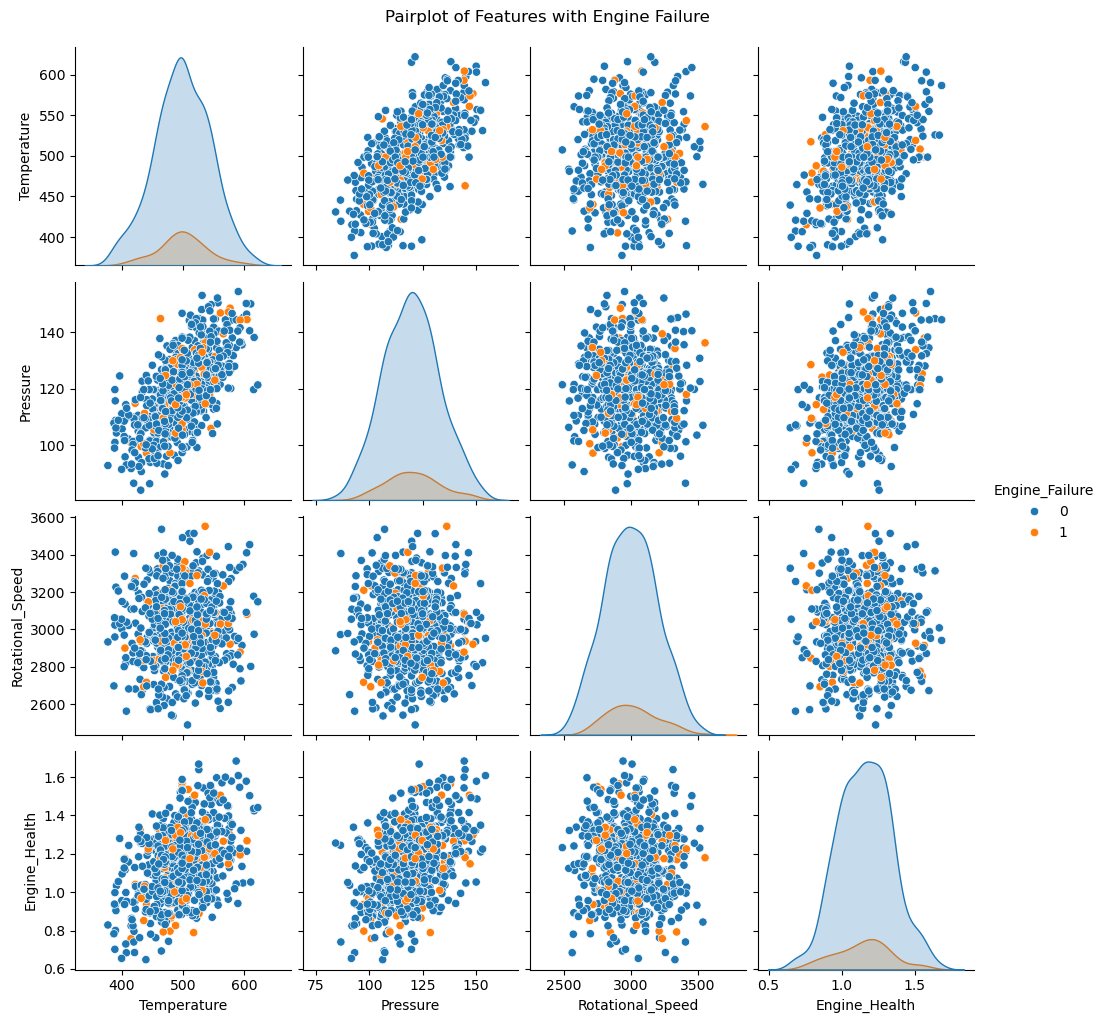

In [32]:
# Bivariate analysis - Pairplot
sns.pairplot(engine_df[columns_to_check + ["Engine_Failure"]], hue="Engine_Failure", diag_kind="kde")
plt.suptitle("Pairplot of Features with Engine Failure", y=1.02)
plt.show()


We examine the relationship between engine features and Engine_Failure using pairplots.

It visualizes relationships between multiple variables related to engine performance and health. The variables included are Temperature, Pressure, Rotational_Speed, and Engine_Health. Here's an interpretation of the key elements:

Diagonal plots: These show the distribution of each variable individually. They appear as density plots, with blue representing the overall distribution and orange representing the distribution for a subset of data (failed engines).
Scatter plots: The off-diagonal plots show the relationships between pairs of variables. Each point represents an individual data record.
Color coding: The points are color-coded in blue and orange. Based on the legend, blue (0) represents normal operation, while orange (1) indicates engine failure.

Key observations:

Temperature vs. Pressure: There's a strong positive correlation.
Rotational_Speed vs. Temperature and Pressure: Moderate positive correlations are visible.
Engine_Health vs. other variables: Shows some correlation, but the relationship is less clear-cut.
Failure cases (orange points): They tend to cluster in certain regions of the plots, suggesting that extreme values in multiple parameters may be associated with engine failures.
Distributions: The individual variable distributions (diagonal plots) show mostly normal-like shapes, with some variables (e.g., Engine_Health) showing slight skewness.

### Multivariate Analysis:

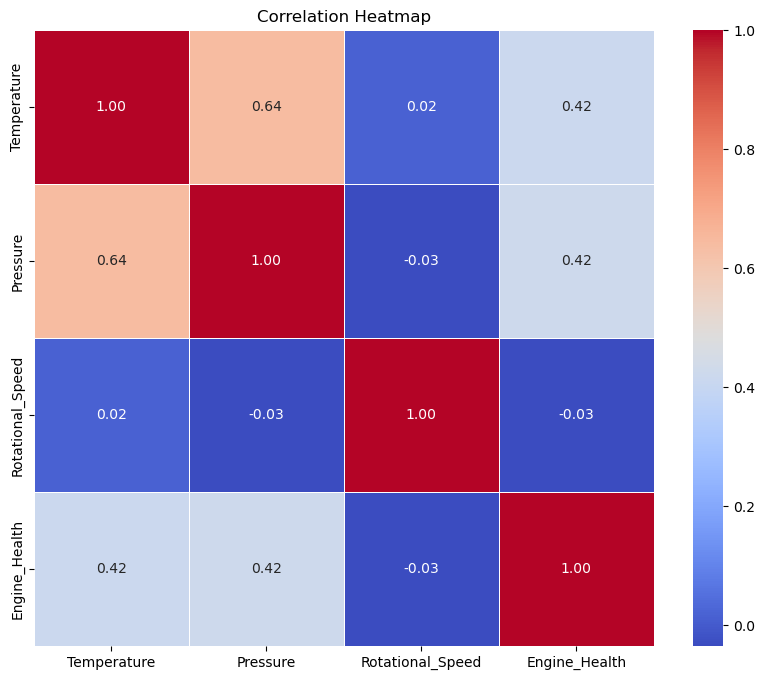

In [35]:
# Multivariate analysis - Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = engine_df[columns_to_check].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


To analyze relationships between multiple variables, we create a correlation heatmap.

The heatmap of Temperature, Pressure, Rotational_Speed, and Engine_Health visualizes the strength and direction of correlations between the variables.

Color scale:

Red indicates positive correlation
Blue indicates negative correlation
The intensity of the color represents the strength of the correlation
White or very light colors indicate weak or no correlation


Specific correlations:

Temperature and Pressure: Strong positive correlation (0.64)
Temperature and Engine_Health: Moderate positive correlation (0.42)
Temperature and Rotational_Speed: Very weak positive correlation (0.02)
Pressure and Engine_Health: Moderate positive correlation (0.42)
Pressure and Rotational_Speed: Very weak negative correlation (-0.03)
Rotational_Speed and Engine_Health: Very weak negative correlation (-0.03)


Diagonal: The diagonal shows perfect correlation (1.00) of each variable with itself, as expected.
Symmetry: The heatmap is symmetrical across its diagonal, which is typical for correlation matrices.

Key insights:

The strongest relationship is between Temperature and Pressure
Engine_Health is positively correlated with both Temperature and Pressure
Rotational_Speed has very weak correlations with all other variables
There are no strong negative correlations between any of the variables

The correlations suggest that Temperature and Pressure might be important indicators of Engine_Health, while Rotational_Speed seems to have little linear relationship with the other variables.

### 8. Time Series Analysis

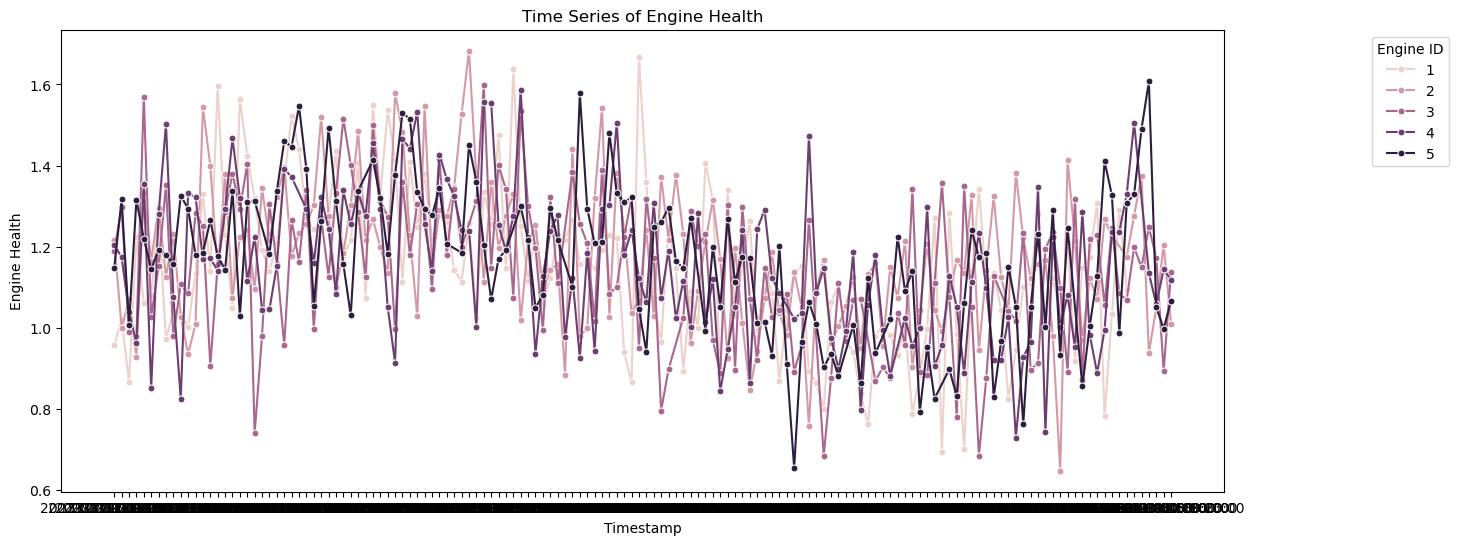

In [38]:
# Data visualization - Time Series of Engine Health
plt.figure(figsize=(15, 6))
sns.lineplot(x="Timestamp", y="Engine_Health", data=engine_df, hue="Engine_ID", marker="o", markersize=5)
plt.title("Time Series of Engine Health")
plt.xlabel("Timestamp")
plt.ylabel("Engine Health")
plt.legend(title="Engine ID", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


Visualizing engine health trends over time.

This is a time series plot of Engine Health for five different engines each represented by a different color line (Engine IDs 1-5) over a period of time. Here's an interpretation of the key features:

    Engine Health scale: The y-axis shows Engine Health values ranging from about 0.6 to 1.7.
    Time scale: The x-axis represents time, with timestamps ranging from 20000000 to 21000000 (milliseconds).
    Variability: There's significant fluctuation in Engine Health for all engines over time, with frequent ups and downs.
    Overall trend: While there's a lot of short-term variability, there seems to be a slight downward trend in Engine Health for most engines as time progresses.
    Similarities: The engines often show similar patterns of increase and decrease, suggesting they might be responding to similar external factors or operating conditions.
    Individual differences: Despite similarities, each engine has its own unique pattern, with some showing more extreme fluctuations than others.
    Range: Most of the Engine Health values fall between 0.8 and 1.6, with occasional spikes above or below this range.
    No clear cycles: There don't appear to be obvious regular cycles or periodicity in the data.

The overall downward trend is an indication of gradual wear and tear on the engines over time.


### 9. Feature Engineering:

In [42]:
# Feature engineering - Extract hour of the day
engine_df['Timestamp'] = pd.to_datetime(engine_df['Timestamp'])
engine_df['Hour_of_Day'] = engine_df['Timestamp'].dt.hour

# Display the dataset with the new feature
engine_df

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0
...,...,...,...,...,...,...,...,...,...
715,715,5,2023-01-01 23:10:00,421.013489,97.450729,2900.108876,1.128137,0,23
716,716,5,2023-01-01 23:20:00,471.540883,111.988270,3325.679936,1.410541,0,23
717,717,5,2023-01-01 23:30:00,539.021207,129.277527,2763.037311,1.326841,0,23
718,718,5,2023-01-01 23:40:00,525.968945,119.488649,2818.602719,0.987268,0,23


New features such as Hour_of_Day and rolling averages are created to capture temporal patterns.

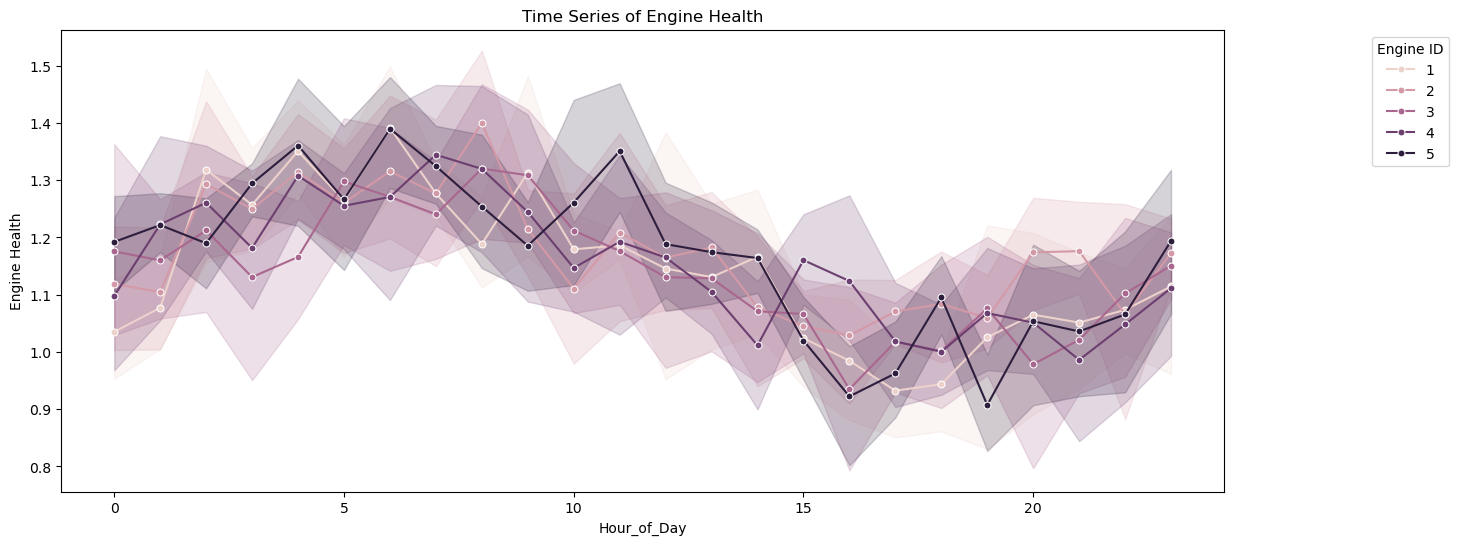

In [44]:
# Data visualization - Time Series of Engine Health per hour
plt.figure(figsize=(15, 6))
sns.lineplot(x="Hour_of_Day", y="Engine_Health", data=engine_df, hue="Engine_ID", marker="o", markersize=5)
plt.title("Time Series of Engine Health")
plt.xlabel("Hour_of_Day")
plt.ylabel("Engine Health")
plt.legend(title="Engine ID", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

#### Create Rolling Averages:
#### Rolling averages can capture trends and patterns over time.
##### Rolling Averages: Calculating rolling averages helps smooth out noise and capture trends over time, especially relevant for time-series data.

In [46]:
# Feature engineering - Create rolling averages for 'Temperature', 'Rotational_Speed' and 'Engine_Health'
engine_df['Rolling_Avg_Temperature'] = engine_df.groupby('Engine_ID')['Temperature'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
engine_df['Rolling_Avg_Rotational_Speed'] = engine_df.groupby('Engine_ID')['Rotational_Speed'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
engine_df['Rolling_Avg_Engine_Health'] = engine_df.groupby('Engine_ID')['Engine_Health'].transform(lambda x: x.rolling(window=10).mean())

# Display the dataset with the new features
engine_df


,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,555.153852,3049.405740,NaN
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,490.928375,3010.889257,NaN
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,485.434241,3125.840960,NaN
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,486.532353,3102.173750,NaN
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,480.433210,3110.459623,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,5,2023-01-01 23:10:00,421.013489,97.450729,2900.108876,1.128137,0,23,474.287958,2867.015671,1.050619
716,716,5,2023-01-01 23:20:00,471.540883,111.988270,3325.679936,1.410541,0,23,478.530803,2912.526919,1.115424
717,717,5,2023-01-01 23:30:00,539.021207,129.277527,2763.037311,1.326841,0,23,485.421242,2890.973027,1.143067
718,718,5,2023-01-01 23:40:00,525.968945,119.488649,2818.602719,0.987268,0,23,487.296560,2923.984666,1.118606


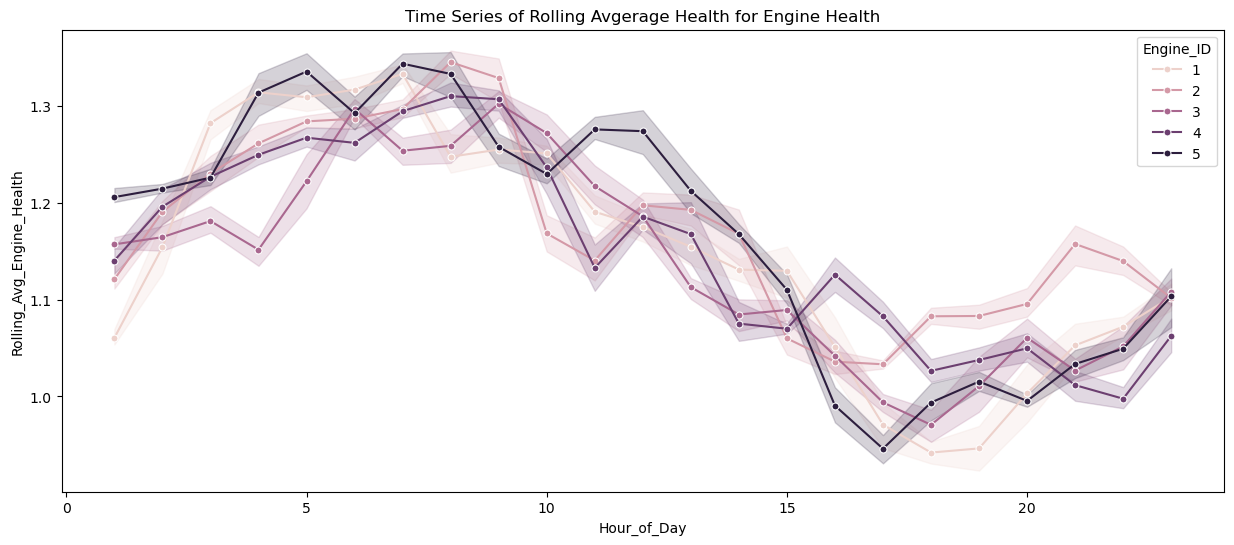

In [47]:
# Data visualization - Time Series of Engine Health per hour
plt.figure(figsize=(15, 6))
sns.lineplot(x="Hour_of_Day", y="Rolling_Avg_Engine_Health", data=engine_df, hue="Engine_ID", marker="o", markersize=5)
plt.title("Time Series of Rolling Avgerage Health for Engine Health")

plt.show()

Above is a time series plot of the rolling average engine health for five different engines over a 24-hour period. The x-axis represents the hour of the day, and the y-axis represents the rolling average engine health.

Key Observations:


The plot tracks the health of 5 different engines, each represented by a different color line and shaded area.
Engine Health scale: The y-axis shows Engine Health values ranging from about 0.8 to 1.5.
Time scale: The x-axis represents the Hour_of_Day, ranging from 0 to 23 (24hr).
Trend lines: Each engine has a line showing the average health at each hour.
Uncertainty bands: The shaded areas around each line likely represent the variability or uncertainty in the health measurements, possibly showing a confidence interval or standard deviation.
Overall trend: There's a general downward trend in Engine Health for all engines as the day progresses, with the highest values typically occurring in the early hours (0-5) and the lowest values in the later hours (15-20).
Variability: The width of the shaded areas varies, indicating that uncertainty or variability in Engine Health changes throughout the day.
Similarities: All engines follow a similar overall pattern, suggesting they might be responding to similar daily operational patterns or environmental factors.
Individual differences: Despite the similar overall trend, each engine has its own unique pattern of ups and downs.
Recovery: There seems to be a slight uptick in Engine Health for most engines in the very late hours (21-23), possibly indicating a recovery period or reduced usage.
Some engines have higher overall rolling average health values than others, and the peaks and troughs of the curves may occur at slightly different times.
    Engine 1: Engine 1 shows the highest overall rolling average health, with a relatively stable performance throughout the day.
    Engine 2: Engine 2 has a slightly lower rolling average health than Engine 1, with a more pronounced dip in the middle of the day.
    Engine 3: Engine 3 shows the lowest overall rolling average health, with a significant drop in performance around hour 10.
    Engine 4 and 5: Engines 4 and 5 have similar rolling average health profiles, with moderate levels throughout the day

#### Binning 'Hour_of_Day':
#### Binning can convert a continuous feature into categorical bins.
##### Binning 'Hour_of_Day': Grouping hours into categories ('Night', 'Morning', 'Afternoon', 'Evening') may help the model recognize patterns related to different parts of the day.


In [49]:
# Feature engineering - Binning 'Hour_of_Day' to nihgt, morning, afternoon, evening
bins = [-1, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
engine_df['Day_Part'] = pd.cut(engine_df['Hour_of_Day'], bins=bins, labels=labels, right=False)

# Display the dataset with the new feature
engine_df.head()

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health,Day_Part
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,555.153852,3049.405740,NaN,Night
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,490.928375,3010.889257,NaN,Night
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,485.434241,3125.840960,NaN,Night
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,486.532353,3102.173750,NaN,Night
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,480.433210,3110.459623,NaN,Night


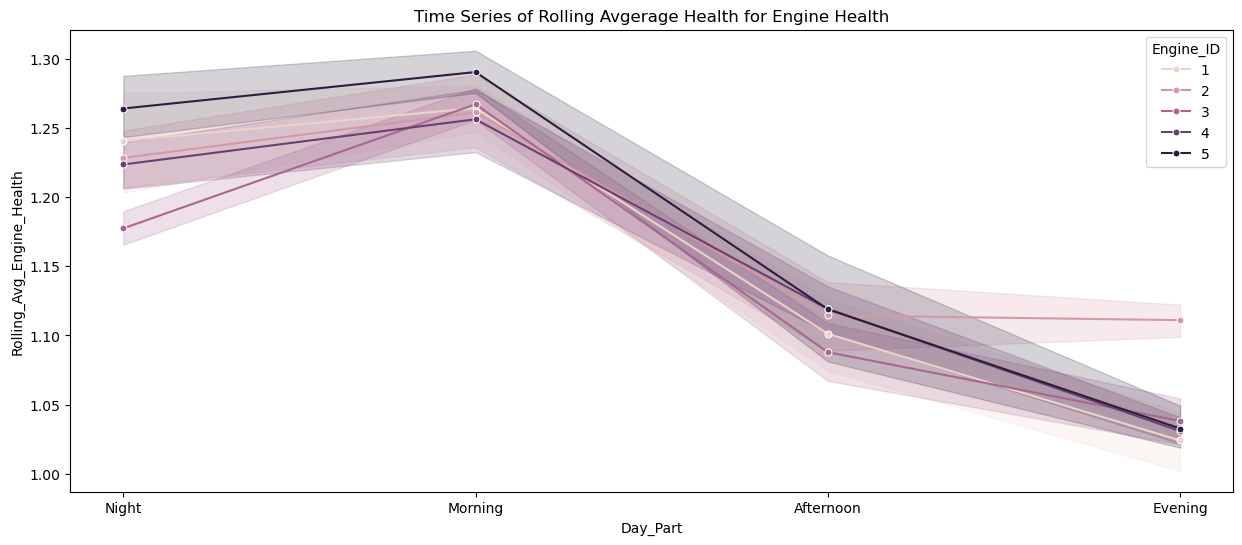

In [50]:
# Data visualization - Binning 'Hour_of_Day' to nihgt, morning, afternoon, evening
plt.figure(figsize=(15, 6))
sns.lineplot(x="Day_Part", y="Rolling_Avg_Engine_Health", data=engine_df, hue="Engine_ID", marker="o", markersize=5)
plt.title("Time Series of Rolling Avgerage Health for Engine Health")

plt.show()

We are visualizing the time series plot of the Rolling Average Health for five different engines (Engine IDs 1-5) over the course of a day, divided into four parts: Night, Morning, Afternoon, and Evening. Here's an interpretation of the key features:

Multiple engines: The plot tracks the rolling average health of 5 different engines, each represented by a different color line.
Engine Health scale: The y-axis shows Rolling_Avg_Engine_Health values ranging from about 1.00 to 1.30.
Time scale: The x-axis represents the Day_Part, divided into Night, Morning, Afternoon, and Evening.
Rolling average: The lines represent a rolling average of engine health, which smooths out short-term fluctuations and highlights longer-term trends.
Confidence intervals: The shaded areas around each line likely represent confidence intervals or uncertainty in the rolling average calculations.
Overall trend: There's a clear pattern across all engines:

Health increases from Night to Morning
A sharp decline from Morning to Afternoon
A continued but slower decline from Afternoon to Evening


Variability between engines: While all engines follow a similar overall pattern, there are differences in their exact values:

Engine 5 (dark purple) consistently shows the highest health scores
Engine 1 (light pink) shows the most variability and often has the lowest health scores


Convergence and divergence: The health scores of all engines converge more closely in the Afternoon, showing less variation between engines. They diverge more in the Morning and Evening.
Night to Morning transition: Most engines show an increase in health from Night to Morning, with Engine 3 (medium purple) showing the most dramatic increase.
Afternoon to Evening transition: Engine 1 shows a slight increase in health from Afternoon to Evening, while all others continue to decline.

#### Interaction Features:
#### Create interaction features to capture relationships between existing features.
##### Interaction Feature: The product of 'Temperature' and 'Rotational_Speed' creates a new feature that captures the interaction between these two variables.


In [52]:
# Feature engineering - Interaction feature between 'Temperature' and 'Rotational_Speed'
engine_df['Temp_Rotational_Interaction'] = engine_df['Temperature'] * engine_df['Rotational_Speed']

# Display the dataset with the new feature
engine_df.head()


,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health,Day_Part,Temp_Rotational_Interaction
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,555.153852,3049.405740,NaN,Night,1.692889e+06
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,490.928375,3010.889257,NaN,Night,1.268320e+06
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,485.434241,3125.840960,NaN,Night,1.592119e+06
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,486.532353,3102.173750,NaN,Night,1.484749e+06
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,480.433210,3110.459623,NaN,Night,1.433598e+06


### Visualization

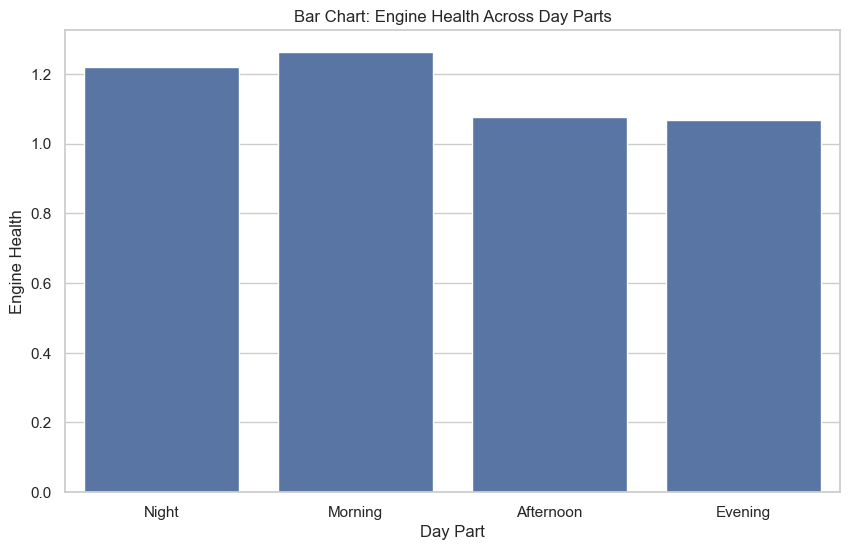

In [54]:
# Set the plotting style
sns.set(style="whitegrid")

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_Part', y='Engine_Health', data=engine_df, ci=None)
plt.title('Bar Chart: Engine Health Across Day Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

This bar chart above displays the average Engine Health across different parts of the day. Here's the interpretation of the key features:

Time periods: The x-axis shows four parts of the day: Night, Morning, Afternoon, and Evening.
Engine Health: The y-axis represents Engine Health, with values ranging from 0 to about 1.4.
Bar heights: Each bar represents the average Engine Health for that part of the day.

Pattern:

Morning has the highest average Engine Health, with a value just above 1.2.
Night has the second-highest average, slightly below 1.2.
Afternoon and Evening have lower averages, both around 1.1.


Trend: There's a clear pattern where Engine Health peaks in the Morning, then declines through the Afternoon and Evening.
Night to Morning transition: There's a slight increase in Engine Health from Night to Morning.
Afternoon to Evening: The Engine Health remains relatively stable from Afternoon to Evening, with only a very slight decrease.

Key insights:

Engines appear to be in their best health during the Morning hours.
There's a significant drop in Engine Health from Morning to Afternoon.
Night-time Engine Health is better than Afternoon and Evening, suggesting some recovery might occur overnight.
The difference between the highest (Morning) and lowest (Evening) average Engine Health is approximately 0.15 units.

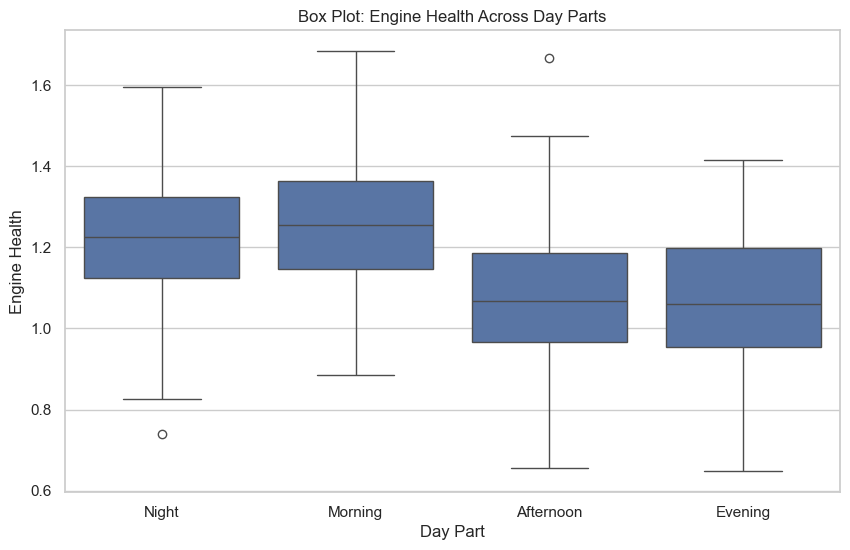

In [55]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_Part', y='Engine_Health', data=engine_df)
plt.title('Box Plot: Engine Health Across Day Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

This box plot above displays the distribution of Engine Health across different parts of the day. Here's an interpretation of the key features:

Time periods: The x-axis shows four parts of the day: Night, Morning, Afternoon, and Evening.
Engine Health: The y-axis represents Engine Health, with values ranging from about 0.6 to 1.7.
Box plot components:

The box represents the interquartile range (IQR), from the 25th to 75th percentile.
The horizontal line within each box is the median.
The whiskers extend to the minimum and maximum values, excluding outliers.
Individual points beyond the whiskers represent outliers.


Distribution patterns:

Morning has the highest median and a large spread, indicating high but variable Engine Health.
Night has the second-highest median, with a slightly smaller spread than Morning.
Afternoon and Evening have lower medians and smaller spreads.


Outliers:

Night has one low outlier.
Afternoon has one high outlier.


Variability:

Morning shows the largest variability in Engine Health.
Afternoon and Evening show less variability.


Trend: There's a clear pattern where Engine Health is highest in the Morning, declines in the Afternoon, and slightly recovers in the Evening.

Key insights:

Engines generally have the best health during Morning hours, but also the most variability.
There's a significant drop in Engine Health from Morning to Afternoon.
Night-time Engine Health is better than Afternoon and Evening, suggesting some recovery occurs overnight.
Afternoon and Evening show more consistent (less variable) Engine Health, but at lower levels.
The presence of outliers indicates occasional extreme values in Engine Health, particularly low at Night and high in the Afternoon.

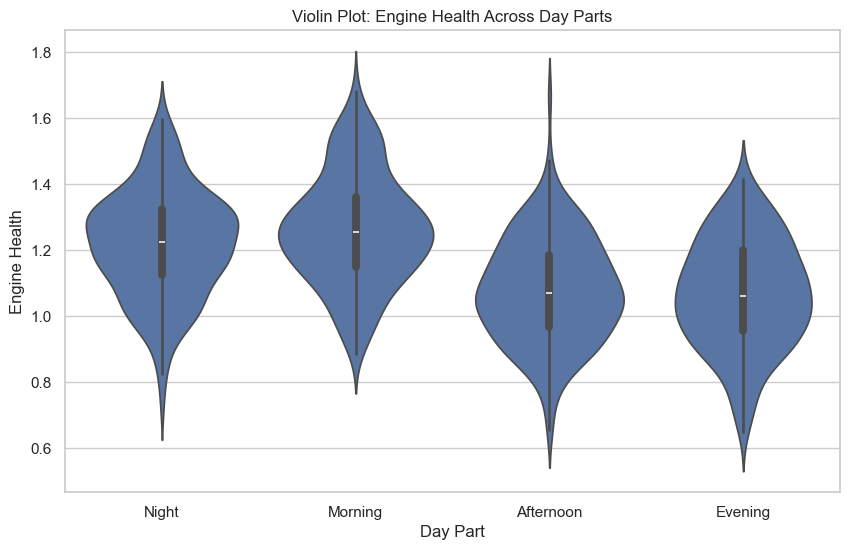

In [56]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day_Part', y='Engine_Health', data=engine_df)
plt.title('Violin Plot: Engine Health Across Day Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

This violin plot displays the distribution of Engine Health across different parts of the day. Here's an interpretation of the key features:

    Time periods: The x-axis shows four parts of the day: Night, Morning, Afternoon, and Evening.
    Engine Health: The y-axis represents Engine Health, with values ranging from about 0.6 to 1.8.
    Violin plot components:
        The width of each "violin" represents the frequency of data points at that Engine Health value.
        The white dot in the center represents the median.
        The thick black bar in the center represents the interquartile range (IQR).
        The thin black line extends to show the rest of the distribution, except for outliers.
    Distribution patterns:
        Morning has the highest median and the widest distribution, indicating high but variable Engine Health.
        Night has a similar shape to Morning but with a slightly lower median and less spread at the top.
        Afternoon and Evening have lower medians and are more symmetrical, with less spread overall.
    Bimodality: The Morning and Night distributions show slight bimodality (two peaks), suggesting two common states of Engine Health during these periods.
    Skewness:
        Morning and Night distributions are slightly positively skewed (longer tail on the upper end).
        Afternoon and Evening distributions are more symmetrical.
    Trend: There's a clear pattern where Engine Health is highest and most variable in the Morning, declines and becomes more consistent in the Afternoon, with a slight recovery in the Evening.

Key insights:

    Engines generally have the best health during Morning hours, but also the most variability and a tendency for extreme high values.
    There's a significant drop in both median Engine Health and variability from Morning to Afternoon.
    Night-time Engine Health distribution is similar to Morning, suggesting some recovery occurs overnight.
    Afternoon and Evening show more consistent Engine Health, but at lower levels.
    The bimodal distributions in Morning and Night suggest two common operating states or conditions during these periods

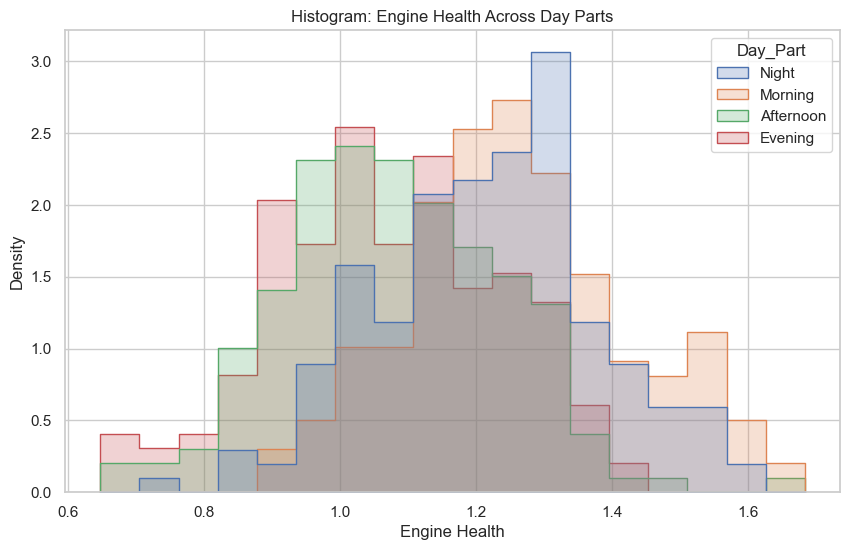

In [57]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(x='Engine_Health', hue='Day_Part', data=engine_df, element="step", stat="density", common_norm=False)
plt.title('Histogram: Engine Health Across Day Parts')
plt.xlabel('Engine Health')
plt.ylabel('Density')
plt.show()

Above is a histogram that compares the distribution of engine health across different day parts: night, morning, afternoon, and evening. Here's an interpretation of the histogram:

Overall Distribution:

    The overall distribution of engine health appears to be somewhat right-skewed, with a longer tail on the higher engine health side. This suggests that most engines have relatively high health scores, but there are some engines with significantly lower health scores.

Day Part Comparisons:

    Night: The histogram for the night shows a relatively narrow distribution, with most engine health scores clustered around 1.0. This suggests that engine health tends to be relatively stable during the night.
    Morning: The morning histogram is slightly wider than the night histogram, indicating a greater range of engine health scores. There is a slight shift towards lower health scores in the morning compared to the night.
    Afternoon: The afternoon histogram is similar to the morning histogram, with a slightly wider distribution and a potential shift towards lower health scores.
    Evening: The evening histogram shows a similar distribution to the afternoon, with a slight shift towards higher health scores.

Key Observations:

    There is some variation in engine health across different day parts, but the overall distribution is relatively consistent.
    The majority of engines have health scores close to 1.0, regardless of the day part.
    There is a tendency for engine health to be slightly lower in the morning and afternoon compared to the night and evening.

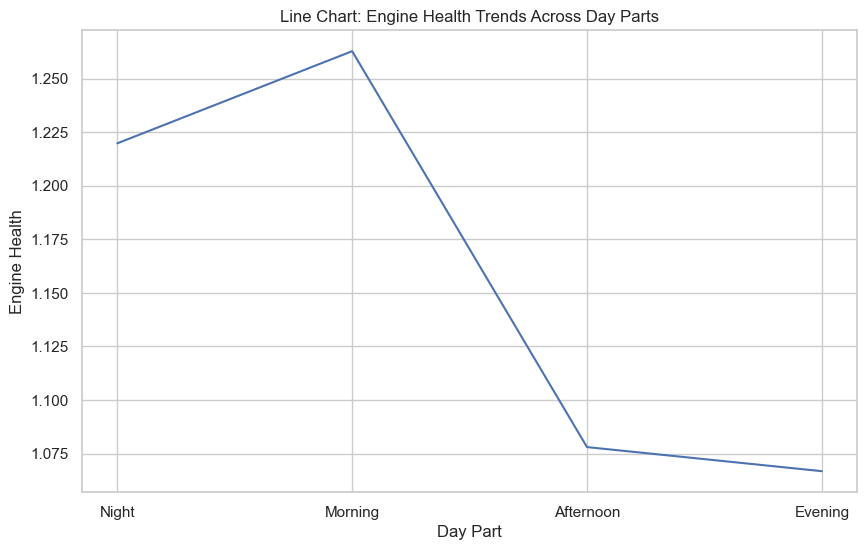

In [58]:
# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_Part', y='Engine_Health', data=engine_df, ci=None)
plt.title('Line Chart: Engine Health Trends Across Day Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

The line chart shows the trend in engine health across different day parts: night, morning, afternoon, and evening. Here's an interpretation of the chart:

General Trend:

    The engine health starts at a relatively high level in the night, increases slightly in the morning, then drops significantly in the afternoon, and remains low in the evening.

Key Observations:

    The most significant decline in engine health occurs between the morning and afternoon.
    The engine health remains relatively stable throughout the night and morning.
    There is a slight increase in engine health from the night to the morning.

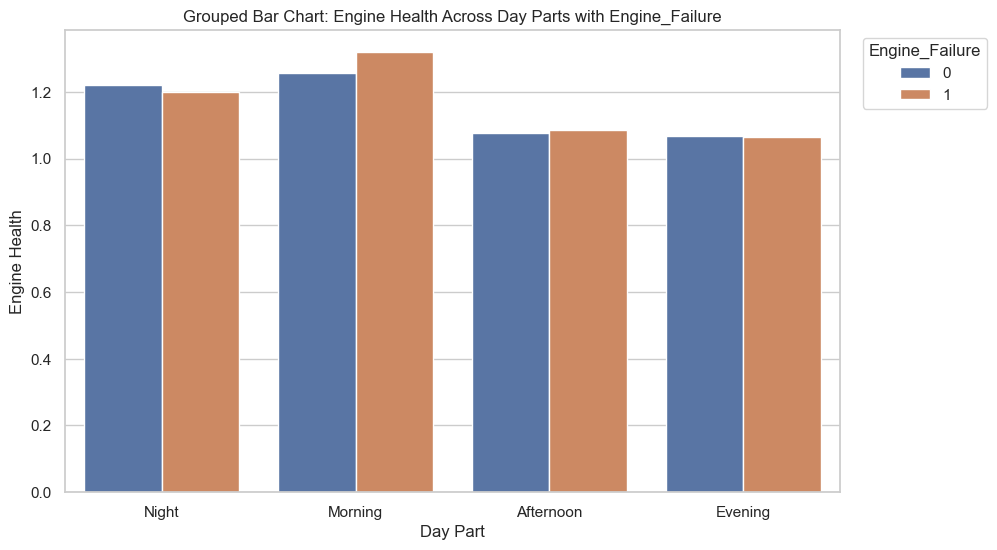

In [59]:
# Grouped Bar Chart
engine_df['Engine_Failure'] = engine_df['Engine_Failure'].astype(str)
engine_df['Day_Part'] = engine_df['Day_Part'].astype(str)


plt.figure(figsize=(10, 6))
sns.barplot(x='Day_Part', y='Engine_Health', data=engine_df, ci=None, hue='Engine_Failure')
# sns.barplot(x='Day_Part', y='Engine_Health', data=engine_df, ci=None)

plt.title('Grouped Bar Chart: Engine Health Across Day Parts with Engine_Failure')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.legend(title='Engine_Failure', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

The grouped bar chart shows the average engine health across different day parts (night, morning, afternoon, and evening) for engines that did and did not experience failure. Here's an interpretation of the chart:

Overall Trends:

    Engines that did not fail: The average engine health for engines that did not fail tends to be higher than for those that did fail, across all day parts.
    Day Part Variations: There are some variations in engine health across different day parts, even for engines that did not fail.

Specific Observations:

    Night: Engines that did not fail have slightly higher average health scores at night compared to those that did fail.
    Morning: The difference in average health between engines that did and did not fail is less pronounced in the morning.
    Afternoon: In the afternoon, engines that did not fail have significantly higher average health scores compared to those that did fail.
    Evening: The difference in average health between the two groups is again more pronounced in the evening, with engines that did not fail having higher scores.

Key Insights:

    The chart suggests that engines that experience failure tend to have lower overall health scores compared to those that do not fail.
    The afternoon appears to be the time of day when the difference in engine health between the two groups is most pronounced, suggesting that factors specific to the afternoon might contribute to engine failure.

In [60]:
# Summary of Engine Failure
engine_failure_summary = engine_df["Engine_Failure"].value_counts()
print("Summary of Engine Failure:")
engine_failure_summary


Summary of Engine Failure:


Engine_Failure
0    611
1     81
Name: count, dtype: int64